In [5]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



In [7]:
##Load the dataframes from the CSV files

arrivals_df = pd.read_csv('arrivals_date_hour_2022.csv')
rideshare_df = pd.read_csv('rideshare_date_hour_2022.csv')
taxi_df = pd.read_csv('taxi_date_hour_2022.csv')
weather_df = pd.read_csv('weather_date_2022.csv')
merged_df = pd.read_csv("merged_df.csv")

In [9]:
# Display the first few rows of each dataframe
print("Arrivals dataframe:")
print(arrivals_df.head())
print("\nRideshare dataframe:")
print(rideshare_df.head())
print("\nTaxi dataframe:")
print(taxi_df.head())
print("\nWeather dataframe:")
print(weather_df.head())
print("\nMerged dataframe:")
print(merged_df.head())

Arrivals dataframe:
         Date  Hour  Arr Pax
0  2022-01-01   0.0       71
1  2022-01-01   1.0      502
2  2022-01-01   6.0      438
3  2022-01-01   7.0     1996
4  2022-01-01   8.0      706

Rideshare dataframe:
         Date  Hour  Rideshare_Count
0  2022-01-01   0.0               21
1  2022-01-01   1.0               16
2  2022-01-01   2.0               51
3  2022-01-01   3.0               22
4  2022-01-01   4.0                7

Taxi dataframe:
         Date  Hour  Taxi_Count
0  2022-01-01   1.0          66
1  2022-01-01   2.0          46
2  2022-01-01   3.0          48
3  2022-01-01   4.0           4
4  2022-01-01   5.0           2

Weather dataframe:
         Date  MEAN_TEMPERATURE  MIN_TEMPERATURE  MAX_TEMPERATURE
0  2022-01-01              -4.1             -9.4              1.3
1  2022-01-02               3.1              0.7              5.6
2  2022-01-03               3.6              1.8              5.4
3  2022-01-04               2.7              0.3              5.2
4  

In [10]:
# Display the size (rows and columns) for each DataFrame
print("\nSize (rows, columns) for each DataFrame:")
print("Arrivals DataFrame:", arrivals_df.shape)
print("Rideshare DataFrame:", rideshare_df.shape)
print("Taxi DataFrame:", taxi_df.shape)
print("Weather DataFrame:", weather_df.shape)
print("Merged DataFrame:", merged_df.shape)


Size (rows, columns) for each DataFrame:
Arrivals DataFrame: (7609, 3)
Rideshare DataFrame: (8508, 3)
Taxi DataFrame: (8308, 3)
Weather DataFrame: (365, 4)
Merged DataFrame: (7203, 8)


In [11]:
# Display statistical summary for each DataFrame
print("\nStatistical Summary for each DataFrame:")
print("Arrivals DataFrame:")
print(arrivals_df.describe())
print("\nRideshare DataFrame:")
print(rideshare_df.describe())
print("\nTaxi DataFrame:")
print(taxi_df.describe())
print("\nWeather DataFrame:")
print(weather_df.describe())
print("\nMerged DataFrame:")
print(merged_df.describe())


Statistical Summary for each DataFrame:
Arrivals DataFrame:
              Hour      Arr Pax
count  7609.000000  7609.000000
mean     12.761335  1214.568406
std       6.540907   757.519531
min       0.000000     1.000000
25%       8.000000   630.000000
50%      13.000000  1121.000000
75%      18.000000  1690.000000
max      23.000000  4161.000000

Rideshare DataFrame:
              Hour  Rideshare_Count
count  8508.000000      8508.000000
mean     11.733898        53.203926
std       6.885395        36.607875
min       0.000000         1.000000
25%       6.000000        24.000000
50%      12.000000        49.000000
75%      18.000000        78.250000
max      23.000000       217.000000

Taxi DataFrame:
              Hour   Taxi_Count
count  8308.000000  8308.000000
mean     12.095209    64.145161
std       6.594241    43.571685
min       1.000000     1.000000
25%       6.000000    27.000000
50%      12.000000    63.000000
75%      18.000000    94.000000
max      23.000000   258.000000


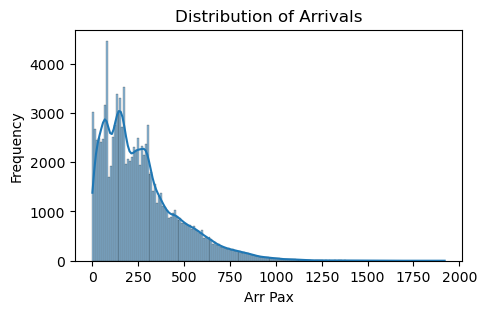

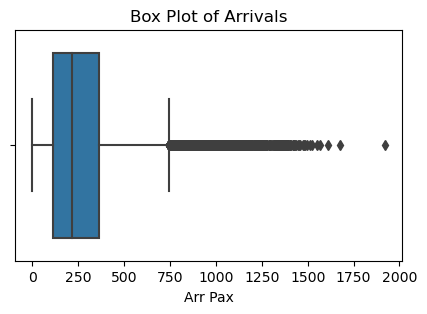

In [15]:
## Arrivals

# Visualize the distribution of 'Arr Pax' using a histogram
plt.figure(figsize=(5, 3))
sns.histplot(arrivals_df['Arr Pax'], kde=True)
plt.title('Distribution of Arrivals')
plt.xlabel('Arr Pax')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of 'Arr Pax' using a box plot
plt.figure(figsize=(5, 3))
sns.boxplot(x='Arr Pax', data=arrivals_df)
plt.title('Box Plot of Arrivals')
plt.xlabel('Arr Pax')
plt.show()

In [16]:
# The histogram exhibits a right-skewed distribution, with the highest frequencies occurring at lower values of Arr Pax, and a long tail extending towards higher values
# The box plot shows that the majority of the arrivals are concentrated within a relatively narrow range, as indicated by the compact interquartile range
# There are also several outliers represented by individual points, suggesting the presence of some extreme values in the data

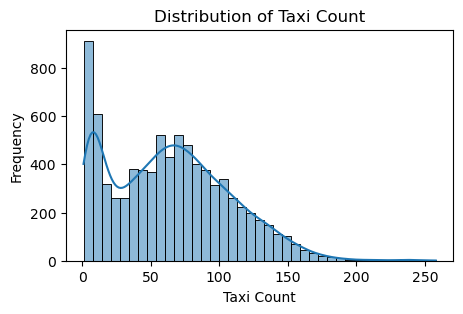

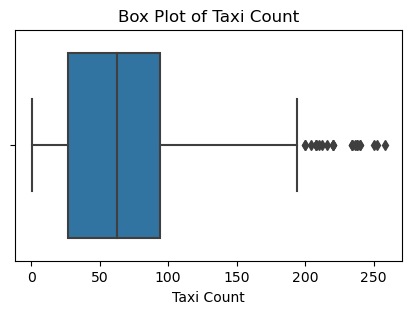

In [18]:
## Taxis

# Visualize the distribution of 'Taxi_Count' using a histogram
plt.figure(figsize=(5, 3))
sns.histplot(taxi_df['Taxi_Count'], kde=True)
plt.title('Distribution of Taxi Count')
plt.xlabel('Taxi Count')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of 'Taxi_Count' using a box plot
plt.figure(figsize=(5, 3))
sns.boxplot(x='Taxi_Count', data=taxi_df)
plt.title('Box Plot of Taxi Count')
plt.xlabel('Taxi Count')
plt.show()


In [ ]:
# The histogram exhibits a left-skewed distribution, with the highest frequency occurring at around 0-25 taxis
# And a rapid decline in frequencies as the taxi count increases
# This pattern suggests that lower taxi counts are more common in the data
# The box plot shows a relatively compact interquartile range (the blue box)
# Indicating that the majority of the taxi counts are concentrated within a narrow range

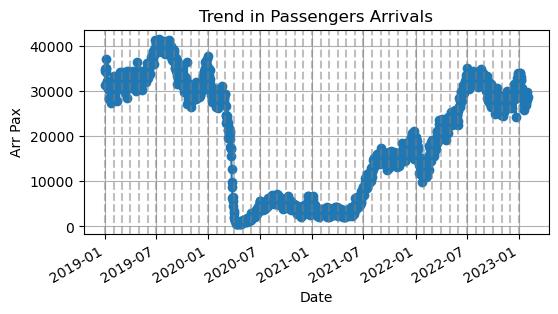

In [23]:
## Arrivals trend in time

arrivals_df['Date'] = pd.to_datetime(arrivals_df['Date'])

# Group by 'Date' and calculate the sum of 'Arr Pax' for each day
daily_arrivals = arrivals_df.groupby('Date')['Arr Pax'].sum()

# Plot the line chart
plt.figure(figsize=(6, 3))
daily_arrivals.plot(kind='line', marker='o', linestyle='-')

# Add vertical lines delimiting each month
for year in range(daily_arrivals.index.min().year, daily_arrivals.index.max().year + 1):
    for month in range(1, 13):
        first_day_of_month = pd.Timestamp(year, month, 1)
        if first_day_of_month in daily_arrivals.index:
            plt.axvline(x=first_day_of_month, color='gray', linestyle='--', alpha=0.5)

plt.title('Trend in Passengers Arrivals')
plt.xlabel('Date')
plt.ylabel('Arr Pax')
plt.grid(True)
plt.show()

In [ ]:
# The variation before and after the pandemic, in the years 2020 and 2021, is very noticeable.
# We consider the year 2022 is appropriate to make a forecast model
# Also 2022 is the 1st year after the pandemic with information for a full year

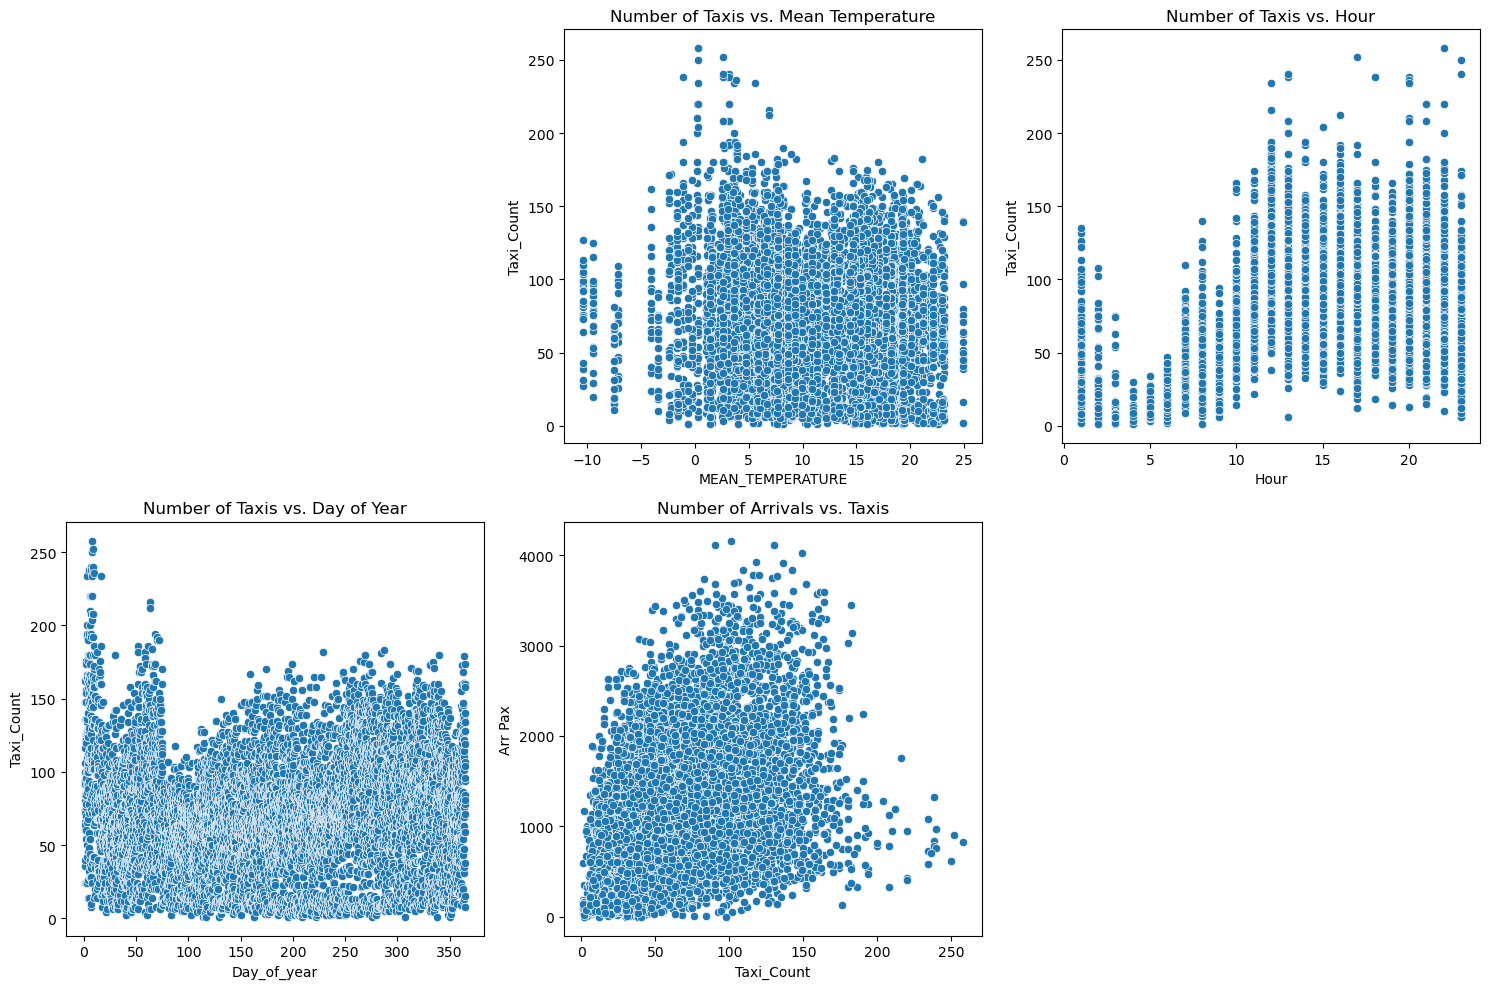

In [24]:
# Visualize the relationship between variables using scatter plots

# Convert 'Date' column to datetime data type
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Extract the day of the year from the 'Date' column
merged_df['Day_of_year'] = merged_df['Date'].dt.dayofyear

# Visualize the relationship between variables using scatter plots
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 2)
sns.scatterplot(x='MEAN_TEMPERATURE', y='Taxi_Count', data=merged_df)
plt.title('Number of Taxis vs. Mean Temperature')

plt.subplot(2, 3, 3)
sns.scatterplot(x='Hour', y='Taxi_Count', data=merged_df)
plt.title('Number of Taxis vs. Hour')

plt.subplot(2, 3, 4)
sns.scatterplot(x='Day_of_year', y='Taxi_Count', data=merged_df)  # Use the corrected column name
plt.title('Number of Taxis vs. Day of Year')

plt.subplot(2, 3, 5)
sns.scatterplot(x='Taxi_Count', y='Arr Pax', data=merged_df)
plt.title('Number of Arrivals vs. Taxis')

plt.tight_layout()
plt.show()